## 문제 설명
- 로또 6/45(이하 '로또'로 표기)는 1부터 45까지의 숫자 중 6개를 찍어서 맞히는 대표적인 복권입니다. 아래는 로또의 순위를 정하는 방식입니다.

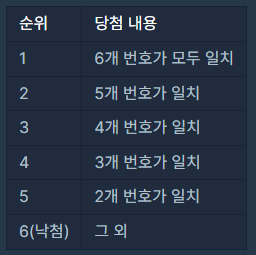

- 로또를 구매한 민우는 당첨 번호 발표일을 학수고대하고 있었습니다. 하지만, 민우의 동생이 로또에 낙서를 하여, 일부 번호를 알아볼 수 없게 되었습니다. 당첨 번호 발표 후, 민우는 자신이 구매했던 로또로 당첨이 가능했던 최고 순위와 최저 순위를 알아보고 싶어 졌습니다.
- 알아볼 수 없는 번호를 0으로 표기하기로 하고, 민우가 구매한 로또 번호 6개가 44, 1, 0, 0, 31 25라고 가정해보겠습니다. 당첨 번호 6개가 31, 10, 45, 1, 6, 19라면, 당첨 가능한 최고 순위와 최저 순위의 한 예는 아래와 같습니다.

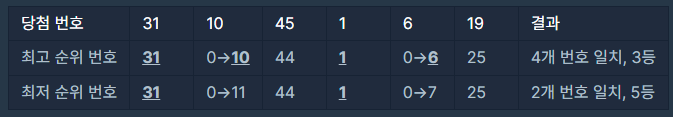

- 순서와 상관없이, 구매한 로또에 당첨 번호와 일치하는 번호가 있으면 맞힌 걸로 인정됩니다.
- 알아볼 수 없는 두 개의 번호를 각각 10, 6이라고 가정하면 3등에 당첨될 수 있습니다.
    - 3등을 만드는 다른 방법들도 존재합니다. 하지만, 2등 이상으로 만드는 것은 불가능합니다.
- 알아볼 수 없는 두 개의 번호를 각각 11, 7이라고 가정하면 5등에 당첨될 수 있습니다.
    - 5등을 만드는 다른 방법들도 존재합니다. 하지만, 6등(낙첨)으로 만드는 것은 불가능합니다.

- 민우가 구매한 로또 번호를 담은 배열 lottos, 당첨 번호를 담은 배열 win_nums가 매개변수로 주어집니다. 이때, 당첨 가능한 최고 순위와 최저 순위를 차례대로 배열에 담아서 return 하도록 solution 함수를 완성해주세요.

## 제한사항
- lottos는 길이 6인 정수 배열입니다.
- lottos의 모든 원소는 0 이상 45 이하인 정수입니다.
    - 0은 알아볼 수 없는 숫자를 의미합니다.
    - 0을 제외한 다른 숫자들은 lottos에 2개 이상 담겨있지 않습니다.
    - lottos의 원소들은 정렬되어 있지 않을 수도 있습니다.
- win_nums은 길이 6인 정수 배열입니다.
- win_nums의 모든 원소는 1 이상 45 이하인 정수입니다.
    - win_nums에는 같은 숫자가 2개 이상 담겨있지 않습니다.
    - win_nums의 원소들은 정렬되어 있지 않을 수도 있습니다.

## 문제 풀이

In [2]:
lottos = [44, 1, 0, 0, 31, 25]
win_nums = [31, 10, 45, 1, 6, 19]
# 예상 답은 [3,5] 입니다.

In [4]:
def solution(lottos, win_nums):
    answer = []
    # 최저와 최고 순위번호를 6으로 할당한다.
    max_win = 6
    min_win = 6
    # 하나씩 맞출 때마다 순위가 상승하지만 두개까지는 똑같은 6위이기에 아래와 같이 할당한다.
    score = [1,2,3,4,5,6,6]
    # for문으로 0부터 5 까지의 인덱스를 i에 할당.
    for i in range(6):
        # 만약 lottos[i]가 win_nums에 있는 번호라면
        if lottos[i] in win_nums:
            # 최저와 최고 순위번호를 1씩 차감한다.
            min_win -= 1
            max_win -= 1
        # 만약 lottos[i]가 0이라면
        elif lottos[i] == 0:
            # 최고 순위 번호만 1씩 차감한다.
            max_win -= 1
    # max_win과 min_win에 해당하는 score의 인덱스 요소를 answer에 넣는다. 
    answer.append(score[max_win])
    answer.append(score[min_win])
    return answer

In [6]:
# 함수를 실행시켜 보자.
solution(lottos, win_nums)

[3, 5]

### 예측한 결과값 [3, 5]가 정상적으로 출력 된다.

## 다른 풀이

In [7]:
lottos = [44, 1, 0, 0, 31, 25]
win_nums = [31, 10, 45, 1, 6, 19]
# 예상 답은 [3,5] 입니다.

In [13]:
def solution(lottos, win_nums):
    # rank라는 딕셔너리를 만든다
    # rank에는 아래와 같은 key와 value값이 있다.
    rank = {
        0: 6,
        1: 6,
        2: 5,
        3: 4,
        4: 3,
        5: 2,
        6: 1
    }
    
    # lottos의 값 중 0인 값의 갯수를 카운팅한다
    zero_count = lottos.count(0)
    
    # 집합을 이용해 lottos와 win_nums를 교집합으로 같은 값만 빼내어 그 길이를 잰다.
    correct_count = len(set(lottos) & set(win_nums))
      
    # 위 예제에서 rank[correct_count + zero_count] -> rank[2 + 2] -> rank[4] = 3
    # rank[correct_count] -> rank[2] = 5
    # [3, 5]가 출력된다.
    return [rank[correct_count + zero_count], rank[correct_count]]

In [14]:
# 함수를 실행해 보자.
solution(lottos, win_nums)

[3, 5]

### 예측한 결과값 [3, 5]가 정상적으로 출력 된다.